
# Portfolio Assignment 2-1

In this assignment, get hands-on experience working with the Python functions. Use your toolset to answer additional questions regarding the dataset.

In [1]:
#
# Data manipulation and visualization libraries
#
import pandas                 as     pd                # type: ignore
import numpy                  as     np                # type: ignore
import seaborn                as     sns               # type: ignore
from   sklearn.cluster        import KMeans            # type: ignore
import matplotlib.pyplot      as     plt               # type: ignore
import plotly.figure_factory  as     ff                # type: ignore
import plotly.graph_objects   as     go                # type: ignore
from   scipy.spatial.distance import pdist, squareform # type: ignore
from   matplotlib             import cm                # type: ignore
from   matplotlib             import colors as mcolors # type: ignore
from   mpl_toolkits.mplot3d   import Axes3D            # type: ignore
from   bioinfokit.visuz       import cluster           # type: ignore
from   sklearn.decomposition  import PCA               # type: ignore
import math
import warnings
warnings.simplefilter(action="ignore", 
                      category=UserWarning)            # Ignore UserWarnings
#
# Set numpy error handling to ignore specific warnings
#
np.seterr(under   = 'ignore')                          # Ignore underflow warnings  
np.seterr(divide  = 'ignore')                          # Ignore divide by zero warnings
np.seterr(invalid = 'ignore')                          # Ignore invalid value warnings
np.seterr(over    = 'ignore')                          # Ignore overflow warnings

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

The first line uses pandas' [`read_csv`] function to load data from a CSV file named `autoSurvey.csv` located in the files directory. The resulting DataFrame, [`dataframe`], contains the tabular data from the CSV file, with columns and rows corresponding to the file's structure.

The second line simply outputs the DataFrame, displaying its contents in the notebook. This is a common practice in Jupyter notebooks to quickly inspect the loaded data, verify that the import was successful, and get an initial sense of the dataset's structure and values before proceeding with further analysis or processing.

The file constains survey data related to automobiles, and the DataFrame will allow you to manipulate and analyze this data using pandas' powerful data handling capabilities.

```python

In [2]:
dataframe = pd.read_csv('files/autoSurvey.csv')
display(dataframe)

driving_properties  interior  technology  comfort  reliability  handling  \
0                     0         0           1        0            1         0   
1                     1         0           0        0            0         1   
2                     1         0           0        1            0         0   
3                     0         1           0        1            1         0   
4                     0         1           1        1            0         0   
..                  ...       ...         ...      ...          ...       ...   
788                   1         0           1        0            1         0   
789                   0         0           0        0            0         0   
790                   1         0           0        0            0         0   
791                   1         1           0        1            1         1   
792                   1         0           0        0            0         1   

     power  consumption  sporty  safety  gender  household  
0        0            0       1       1       0          1  
1        0            0       0       1       0          1  
2        1            0       1       1       0          1  
3        0            0       1       1       0          0  
4        0            0       0       0       0          0  
..     ...          ...     ...     ...     ...        ...  
788      1            0       0       1       0          0  
789      0            0       0       0       0          1  
790      1            1       0       1       0          1  
791      1            0       1       0       0          1  
792      1            0       1       0       0          1  

[793 rows x 12 columns]

This code calculates the covariance matrix of the data in the DataFrame `dataframe` using NumPy's `np.cov` function. The covariance matrix is a square matrix that shows the covariance (a measure of how much two variables change together) between each pair of columns in the dataset. This is useful for understanding relationships and dependencies among variables, especially in statistical analysis and machine learning.

The line `print("Covariant Martix")` outputs a label to the console, indicating that the following output is the covariance matrix. The final line simply displays the matrix itself, allowing you to inspect the computed covariances. Note that this calculation assumes all columns are numeric; if there are non-numeric columns, you may need to select only the relevant columns before computing the covariance.

In [3]:
covMatrix = np.cov(dataframe)
print("Covariant Martix")
display(covMatrix)

Covariant Martix


array([[ 0.26515152,  0.03030303,  0.04545455, ..., -0.00757576,
        -0.03030303, -0.00757576],
       [ 0.03030303,  0.24242424,  0.09090909, ...,  0.12121212,
         0.03030303,  0.12121212],
       [ 0.04545455,  0.09090909,  0.27272727, ...,  0.13636364,
         0.09090909,  0.13636364],
       ...,
       [-0.00757576,  0.12121212,  0.13636364, ...,  0.26515152,
        -0.03030303,  0.08333333],
       [-0.03030303,  0.03030303,  0.09090909, ..., -0.03030303,
         0.24242424,  0.15151515],
       [-0.00757576,  0.12121212,  0.13636364, ...,  0.08333333,
         0.15151515,  0.26515152]])

This code generates a dendrogram visualization of the data in the DataFrame `dataframe` using Plotly's figure factory. The first line, `np.random.seed(42), sets the random seed for NumPy to ensure reproducibility—any random operations performed will yield the same results each time the code runs.

The second line creates a dendrogram figure with `ff.create_dendrogram(dataframe, color_threshold = 1.5)`. A dendrogram is a tree-like diagram that shows the hierarchical relationships between observations, often used in clustering analysis. The `color_threshold = 1.5` argument determines how clusters are colored based on their linkage distance.

The third line, `fig.update_layout(width=800, height=500)`, sets the size of the figure for better visibility. Finally, `fig.show()` displays the dendrogram in the notebook, allowing you to visually inspect the clustering structure of your data. This visualization helps you understand how data points group together and can guide further analysis or feature selection.

In [5]:
np.random.seed(42)
fig = ff.create_dendrogram(dataframe, color_threshold = 1.5)
fig.update_layout(width=800, height=500)
fig.show()

In [6]:
# Initialize figure by creating upper dendrogram
fig = ff.create_dendrogram(dataframe, orientation='bottom')
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'
# Create Side Dendrogram
dendro_side = ff.create_dendrogram(dataframe, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'
# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)
# Create Heatmap
dendro_leaves   = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves   = list(map(int, dendro_leaves))
data_dist       = pdist(dataframe)
heat_data       = squareform(data_dist)
heat_data       = heat_data[dendro_leaves,:]
heat_data       = heat_data[:,dendro_leaves]
heatmap         = [ go.Heatmap(x = dendro_leaves, y = dendro_leaves, z = heat_data, colorscale = 'Blues')]
heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']
# Add Heatmap Data to Figure
for data in heatmap:
    fig.add_trace(data)
# Edit Layout
fig.update_layout({'width':800, 'height':800,'showlegend':False, 'hovermode': 'closest'})
# xaxis is the dendrogram on the top
# xaxis2 is the dendrogram on the right side
# yaxis is the heatmap on the left side
# yaxis2 is the heatmap on the bottom
# Edit xaxis
fig.update_layout(xaxis = {'domain'        : [.15, 1],
                           'mirror'        : False,
                           'showgrid'      : False,
                           'showline'      : False,
                           'zeroline'      : False,
                           'ticks'         : ""})
# Edit xaxis2
fig.update_layout(xaxis2= {'domain'        : [0, .15],
                           'mirror'        : False,
                           'showgrid'      : False,
                           'showline'      : False,
                           'zeroline'      : False,
                           'showticklabels': False,
                           'ticks'         : ""})
# Edit yaxis
fig.update_layout(yaxis = {'domain'        : [0, .85],
                           'mirror'        : False,
                           'showgrid'      : False,
                           'showline'      : False,
                           'zeroline'      : False,
                           'showticklabels': False,
                           'ticks'         : ""})
# Edit yaxis2
fig.update_layout(yaxis2= {'domain'        :[.825, .975],
                           'mirror'        : False,
                           'showgrid'      : False,
                           'showline'      : False,
                           'zeroline'      : False,
                           'showticklabels': False,
                           'ticks'         : ""})
# Plot!
fig.update_layout(width=1600, height=1000)
fig.show()

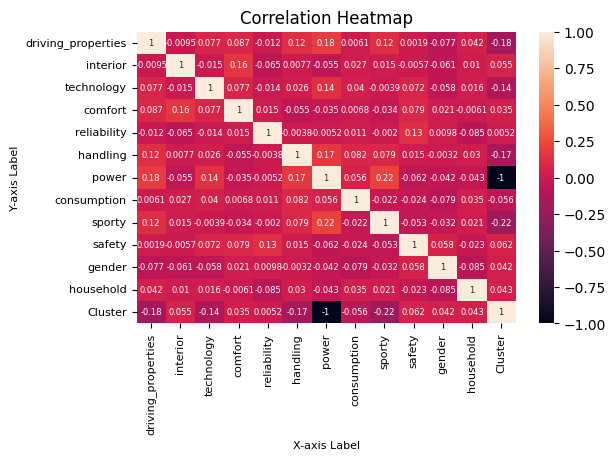

<Figure size 4.2e+06x4.2e+06 with 0 Axes>

In [23]:
# generating correlation heatmap
sns.heatmap(dataframe.corr(), annot = True,annot_kws={"fontsize":6})
# posting correlation heatmap to output console
plt.title('Correlation Heatmap')
plt.xticks(rotation = 90)
plt.yticks(rotation =  0)
plt.tight_layout()
plt.xlabel('X-axis Label', fontsize=8)
plt.ylabel('Y-axis Label', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.figure(figsize  = (7000, 7000), dpi=600)
plt.show()

In [24]:
clusters = 2
# Generating different colors in ascending order of their hsv values
colors = list(zip(*sorted((
                    tuple(mcolors.rgb_to_hsv(
                          mcolors.to_rgba(color)[:3])), name)
                     for name, color in dict(
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
                                                      ).items())))[1]
# number of steps to taken generate n(clusters) colors
skips               = math.floor(len(colors[5 : -5])/clusters)
cluster_colors      = colors[5 : -5 : skips]
# generating correlation data
data                = dataframe.corr()
data.index          = range(0, len(data))
data.rename(columns = dict(zip(data.columns, data.index)), inplace = True)
data                = data.astype(object)
# Generating coordinates with corresponding correlation values
for i in range(0, len(data)):
    for j in range(0, len(data)):
        if i != j:
            data.iloc[i, j] = (i, j, data.iloc[i, j])
        else :
            data.iloc[i, j] = (i, j, 0)
df_list = []
# flattening dataframe values
for sub_list in data.values:
    df_list.extend(sub_list)
# converting list of tuples into trivariate dataframe
plot_df = pd.DataFrame(df_list)
fig     = plt.figure()
ax      = Axes3D(fig)
# plotting 3D trisurface plot
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2],cmap = cm.jet, linewidth = 0.2)
plt.show()

<Figure size 640x480 with 0 Axes>

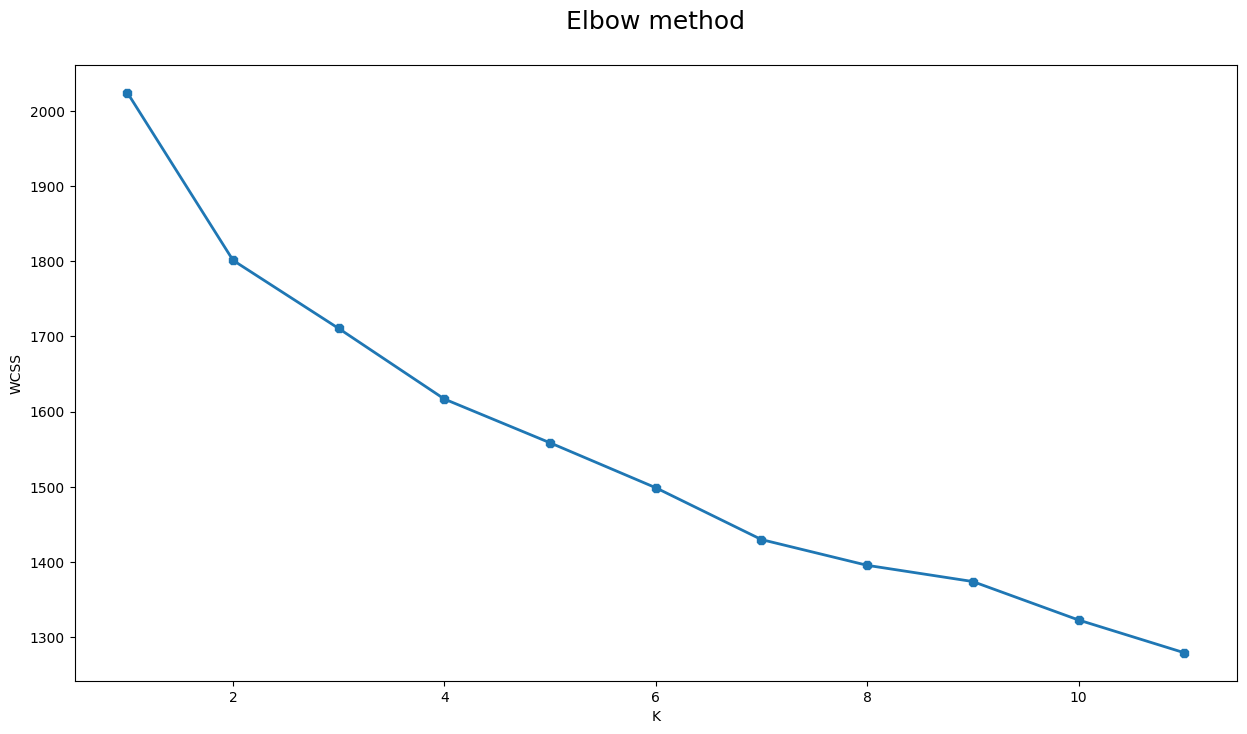

In [9]:
# K-Means clustering to find optimal number of clusters using the Elbow method
# Extracting relevant features for clustering
# Note: The features used for clustering are 'driving_properties', 'interior', 'technology', 
# 'comfort', 'reliability', 'handling', 'power', 'consumption', 'sporty', 'safety', 'gender', 'household'
x_input = dataframe.loc[:, ['driving_properties', 'interior'   , 'technology',
                            'comfort'           , 'reliability', 'handling',
                            'power'             , 'consumption', 'sporty',
                            'safety'            , 'gender'     , 'household']].values
# Initialize the list to store WCSS values
wcss = []
# Fit KMeans for different values of k and compute WCSS
for k in range(1, 12):
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=0)
    k_means.fit(x_input)
    wcss.append(k_means.inertia_)
# Plotting the Elbow method graph     
plt.figure(figsize=(15,8))
plt.plot(range(1, 12), wcss, linewidth=2, marker='8')
plt.title('Elbow method\n', fontsize=18)
plt.xlabel('K')
plt.ylabel('WCSS')
ax     = plt.gca()
line   = ax.get_lines()[0]
xydata = line.get_xydata()
plt.show()

In [10]:
# K-Means clustering with the optimal number of clusters
# Extracting relevant features for clustering
# Note: The features used for clustering are 'driving_properties', 'interior', 'technology', 
# 'comfort', 'reliability', 'handling', 'power', 'consumption', 'sporty', 'safety', 'gender', 'household'
n_clusters = 2
kmeans     = KMeans(n_clusters, random_state=0)
y          = kmeans.fit_predict(dataframe[['driving_properties', 'interior'   , 'technology', 
                                           'comfort'           , 'reliability','handling',
                                           'power'             , 'consumption', 'sporty', 
                                           'safety'            , 'gender'     , 'household']])
dataframe['Cluster'] = y
dataframe.head()

driving_properties  interior  technology  comfort  reliability  handling  \
0                   0         0           1        0            1         0   
1                   1         0           0        0            0         1   
2                   1         0           0        1            0         0   
3                   0         1           0        1            1         0   
4                   0         1           1        1            0         0   

   power  consumption  sporty  safety  gender  household  Cluster  
0      0            0       1       1       0          1        1  
1      0            0       0       1       0          1        1  
2      1            0       1       1       0          1        0  
3      0            0       1       1       0          0        1  
4      0            0       0       0       0          0        1

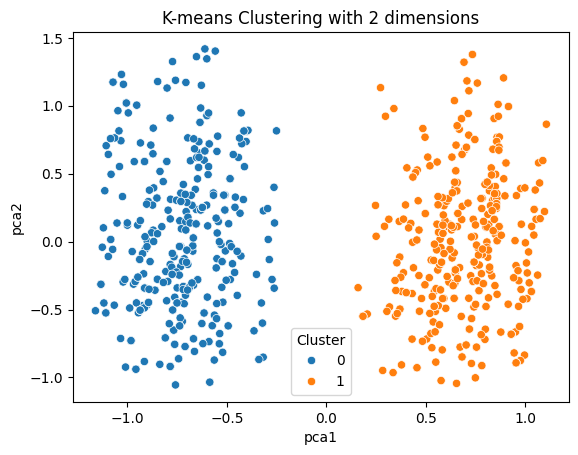

In [11]:
# Run PCA on the data and reduce the dimensions in pca_num_components dimensions
# Extracting relevant features for clustering
n_clusters         = 2
pca_num_components = 2
reduced_data       = PCA(n_components=pca_num_components).fit_transform(dataframe)
results            = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=dataframe['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [12]:
# Run PCA on the data and reduce the dimensions in pca_num_components dimensions
df       = dataframe.iloc[: , :-1]
pca_out  = PCA(n_components=pca_num_components).fit(df)
loadings = pca_out.components_
pca_out.explained_variance_ratio_

array([0.13793337, 0.1149353 ])

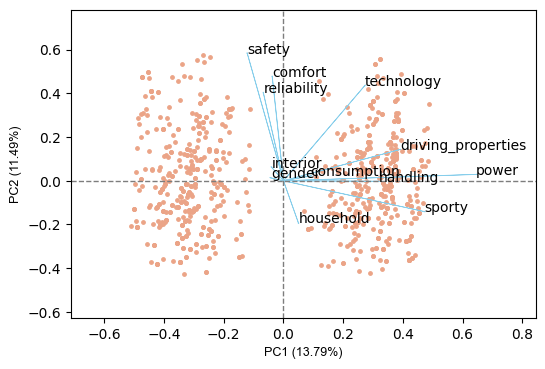

In [13]:
# Create a biplot to visualize the PCA results
# Note: A biplot is a graphical representation of the PCA results, showing both the scores and the loadings.
# The scores represent the data points in the reduced PCA space, while the loadings represent the contribution 
# of each original feature to the PCA components.
# The biplot helps to visualize the relationships between the observations and the variables.
cluster.biplot(show = True, cscore   = reduced_data, 
                            loadings = loadings, 
                            labels   = df.columns.values,
                            var1     = round(pca_out.explained_variance_ratio_[0]*100, 2), 
                            var2     = round(pca_out.explained_variance_ratio_[1]*100, 2))